In [50]:
# module import

import os
import numpy

from skimage import io
from matplotlib import pyplot
from skimage import filters
from skimage import segmentation
from scipy import ndimage
from skimage import measure


# function definition

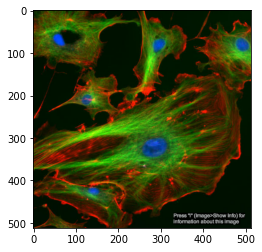

In [11]:
filename = os.path.join("./data", "FluorescentCells.tif")
filename

fluocells = io.imread(filename)
pyplot.imshow(fluocells)

In [16]:
# extract channels

fluocells_r = fluocells[:, :, 0] # red
fluocells_g = fluocells[:, :, 1] # green
fluocells_b = fluocells[:, :, 2] # blue

Text(0.5, 1.0, 'blue channel')

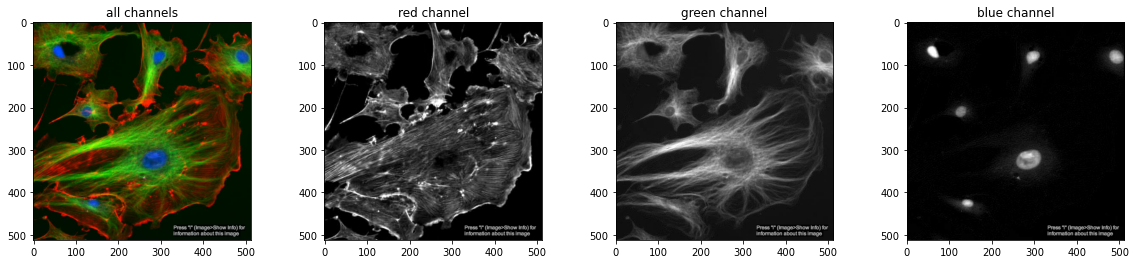

In [18]:
fig, subplots = pyplot.subplots(nrows=1, ncols=4, figsize=(20, 4))

(subp_rgb, subp_r, subp_g, subp_b) = subplots

subp_rgb.imshow(fluocells)
subp_rgb.set_title("all channels")

subp_r.imshow(fluocells_r, cmap="gray")
subp_r.set_title("red channel")

subp_g.imshow(fluocells_g, cmap="gray")
subp_g.set_title("green channel")

subp_b.imshow(fluocells_b, cmap="gray")
subp_b.set_title("blue channel")

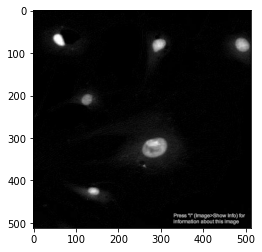

In [28]:
nuclei = fluocells_b[:475, :]
pyplot.imshow(nuclei, cmap="gray")

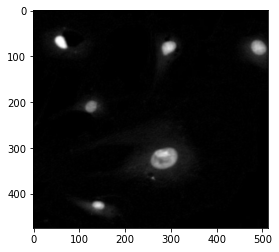

In [33]:
nuclei_filtered = filters.gaussian(nuclei, sigma=1)
pyplot.imshow(nuclei_filtered, cmap="gray")

In [37]:
markers = numpy.zeros_like(nuclei_filtered)

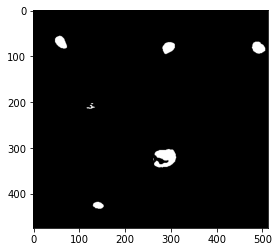

In [39]:
nuclei_filtered_in = nuclei_filtered > 0.5
pyplot.imshow(nuclei_filtered_in, cmap="gray")
markers[nuclei_filtered_in] = 2

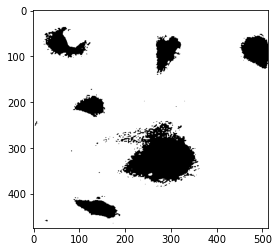

In [40]:
nuclei_filtered_out = nuclei_filtered < 0.05
pyplot.imshow(nuclei_filtered_out, cmap="gray")
markers[nuclei_filtered_out] = 1

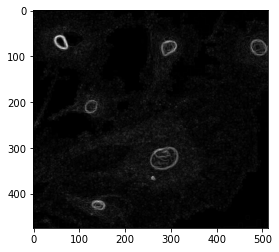

In [41]:
elevation_map = filters.sobel(nuclei)
pyplot.imshow(elevation_map, cmap="gray")

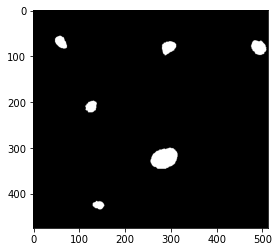

In [43]:
seg = segmentation.watershed(elevation_map, markers)
pyplot.imshow(seg, cmap="gray")

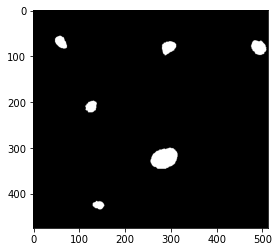

In [49]:
seg_filled = ndimage.binary_fill_holes(seg - 1)
pyplot.imshow(seg_filled, cmap="gray")

In [52]:
labels = measure.label(seg_filled)
print(labels.max())

6
